In [5]:
!python --version

Python 3.10.14


In [2]:
print("hello world")

hello world


### Importing libraries

In [6]:
import pandas as pd

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

### Reading the dataset

In [36]:
df = pd.read_parquet("D:\Study\Conda Projects\mlops-zoom\data\green_tripdata_2023-01.parquet")

In [37]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,None,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,None,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,None,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,None,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,None,1.0,8.00,1.0,1.0,0.00


In [38]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [39]:
# Creating the target variable: duration
df['duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']

In [40]:
df['duration'].head()

0   0 days 00:11:01
1   0 days 00:06:46
2   0 days 00:06:20
3   0 days 00:05:49
4   0 days 00:05:58
Name: duration, dtype: timedelta64[us]

In [41]:
# Converting duration into minutes
df['duration'] = df['duration'].apply(lambda td: td.total_seconds()/60)

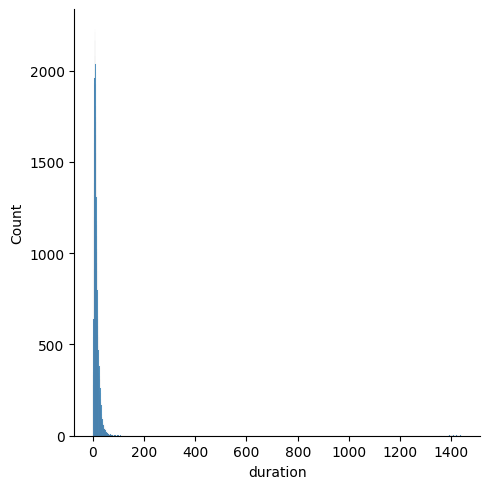

In [42]:
sns.displot(df['duration'])

In [23]:
df['duration'].describe(percentiles=[0.95,0.98,0.99])

count    1401.000000
mean       17.672698
std       101.375698
min         0.000000
50%         1.433333
95%        41.233333
98%        64.600000
99%       126.316667
max      1423.716667
Name: duration, dtype: float64

In [43]:
df = df[((df['duration'] >= 1) & (df['duration'] <= 60))]

In [44]:
categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']

In [45]:
df[categorical] = df[categorical].astype(str)

In [46]:
train_dicts = df[categorical+numerical].to_dict(orient='records')

In [48]:
dv = DictVectorizer()

In [49]:
X_train = dv.fit_transform(train_dicts)

In [50]:
target='duration'
y_train = df[target].values